In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_parquet(r"C:\Users\fatih\Downloads\Call_Report_BankData_852218.parquet", engine='fastparquet')
df.head()

,Item,IDRSSD,Value,Date,CValue,schedule,schedule.label,Label1clean,Label2clean,Label3clean,...,line2,line3,line4,line5,line6,line7,column.label,type,balance,Status
0,RCFA3792,852218.0,1.644990e+11,2014-03-31,1.644990e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
1,RCFA3792,852218.0,1.683120e+11,2014-06-30,3.813000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
2,RCFA3792,852218.0,1.705590e+11,2014-09-30,2.247000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
3,RCFA3792,852218.0,1.733280e+11,2014-12-31,2.769000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
4,RCFA3792,852218.0,1.781850e+11,2015-03-31,1.781850e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main


In [48]:
call_report_bankdata = df
df2 = call_report_bankdata.pivot_table(index='Date', columns=['schedule','labelStringclean'], values='CValue', aggfunc='sum')
df2.head()

schedule                             ENT                 \
labelStringclean FDIC certificate number Reporting date   
Date                                                      
2001-03-31                           NaN     20010331.0   
2001-06-30                           NaN          299.0   
2001-09-30                           NaN          300.0   
2001-12-31                           NaN          301.0   
2002-03-31                           NaN     20020331.0   

schedule                                             RC  \
labelStringclean Accumulated other comprehensive income   
Date                                                      
2001-03-31                                 -284000000.0   
2001-06-30                                 -388000000.0   
2001-09-30                                  921000000.0   
2001-12-31                                 -621000000.0   
2002-03-31                                 -877000000.0   

schedule                                             \
labelStringclean Available-for-sale debt securities   
Date                                                  
2001-03-31                             6.036100e+10   
2001-06-30                             5.420000e+08   
2001-09-30                            -2.316000e+09   
2001-12-31                            -5.671000e+09   
2002-03-31                             5.615900e+10   

schedule                                                                       \
labelStringclean Bank's fiscal year-end date (report the date in MMDD format)   
Date                                                                            
2001-03-31                                                      NaN             
2001-06-30                                                      NaN             
2001-09-30                                                      NaN             
2001-12-31                                                      NaN             
2002-03-31                                                      NaN             

schedule                        \
labelStringclean  Common stock   
Date                             
2001-03-31        1.211000e+09   
2001-06-30        0.000000e+00   
2001-09-30        0.000000e+00   
2001-12-31        2.650000e+08   
2002-03-31        1.785000e+09   

schedule                                                                  \
labelStringclean Direct and indirect investments in real estate ventures   
Date                                                                       
2001-03-31                                                      NaN        
2001-06-30                                                      NaN        
2001-09-30                                                      NaN        
2001-12-31                                                      NaN        
2002-03-31                                                      NaN        

schedule                                                                                       \
labelStringclean Equity securities with readily determinable fair values not held for trading   
Date                                                                                            
2001-03-31                                                      NaN                             
2001-06-30                                                      NaN                             
2001-09-30                                                      NaN                             
2001-12-31                                                      NaN                             
2002-03-31                                                      NaN                             

schedule                                                      \
labelStringclean Federal funds purchased in domestic offices   
Date                                                           
2001-03-31                                               NaN   
2001-06-30                                       

In [49]:
df2.shape

(89, 943)

In [50]:
df2.isnull().sum().sort_values(ascending=False).head(15)

schedule  labelStringclean                                                                                                                                          
RCRI      Distributions and discretionary bonus payments during the quarter                                                                                             88
RCB       Unallocated portfolio layer fair value hedge basis adjustments                                                                                                88
RCRI      Eligible retained income                                                                                                                                      88
RCM       Estimated number of international remittance transfers for which your institution applied the permanent exchange rate exception                               87
          Estimated number of international remittance transfers for which your institution applied the permanent covered third-party fee exception    

In [51]:
is_null = pd.DataFrame(df2.isnull().sum(), columns = ['isnull']).sort_values(by="isnull", ascending=False)
is_null

isnull
schedule labelStringclean                                          
RCRI     Distributions and discretionary bonus payments ...      88
RCB      Unallocated portfolio layer fair value hedge ba...      88
RCRI     Eligible retained income                                88
RCM      Estimated number of international remittance tr...      87
         Estimated number of international remittance tr...      87
...                                                             ...
RCT      Total gross fiduciary and related services income        0
RCD      Securities issued by states and political subdi...       0
         Total trading assets                                     0
         Total trading liabilities                                0
RI       Commodity and other exposures                            0

[943 rows x 1 columns]

In [52]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCRI     Distributions and discretionary bonus payments ...        98.876404
RCB      Unallocated portfolio layer fair value hedge ba...        98.876404
RCRI     Eligible retained income                                  98.876404
RCM      Estimated number of international remittance tr...        97.752809
         Estimated number of international remittance tr...        97.752809
RIE      Effect of adoption of Current Expected Credit L...        96.629213
         Initial allowances for credit losses recognized...        96.629213
         Effect of adoption of current expected credit l...        96.629213
RCRI     Leverage ratio                                            95.505618
RCCI     Other loans                                               95.505618
RCRI     Common equity tier 1 capital ratio                        95.505618
         Total capital ratio                                       95.505618
         Tier 1 capital ratio                                      95.505618
RCCII    "Loans to finance agricultural production and o...        94.382022
         "Loans secured by nonfarm nonresidential proper...        94.382022

In [53]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,schedule,labelStringclean,isnull,percentage_null
0,RCRI,Distributions and discretionary bonus payments...,88,98.876404
1,RCB,Unallocated portfolio layer fair value hedge b...,88,98.876404
2,RCRI,Eligible retained income,88,98.876404
3,RCM,Estimated number of international remittance t...,87,97.752809
4,RCM,Estimated number of international remittance t...,87,97.752809
...,...,...,...,...
938,RCT,Total gross fiduciary and related services income,0,0.000000
939,RCD,Securities issued by states and political subd...,0,0.000000
940,RCD,Total trading assets,0,0.000000
941,RCD,Total trading liabilities,0,0.000000


In [54]:
def df_nans(df2, limit):
    missing = df2.isnull().sum()*100 / df2.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [55]:
df_nans(df2, 90)

schedule  labelStringclean                                                                                                                                                                                                                                          
RCB       Unallocated portfolio layer fair value hedge basis adjustments                                                                                                                                                                                                98.876404
RCCI      Other loans                                                                                                                                                                                                                                                   95.505618
RCCII     "Commercial and industrial loans" reported in Schedule RC-C, part I, item 4                                                                                                          

In [56]:
df_nans(df2, 90).index

MultiIndex([(  'RCB', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            (  'RCL', ...),
            (  'RCM', ...),
            (  'RCM', ...),
            (  'RCO', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'])

In [57]:
df_nans(df2, 80).values

array([83.14606742, 80.8988764 , 98.87640449, 85.39325843, 95.50561798,
       85.39325843, 89.88764045, 94.38202247, 94.38202247, 94.38202247,
       94.38202247, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       92.13483146, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       85.39325843, 94.38202247, 83.14606742, 82.02247191, 84.26966292,
       97.75280899, 97.75280899, 84.26966292, 89.88764045, 89.88764045,
       89.88764045, 89.88764045, 89.88764045, 89.88764045, 89.88764045,
       91.01123596, 80.8988764 , 80.8988764 , 80.8988764 , 95.50561798,
       98.87640449, 85.39325843, 85.39325843, 98.87640449, 85.39325843,
       85.39325843, 85.39325843, 85.39325843, 85.39325843, 95.50561798,
       80.8988764 , 95.50561798, 95.50561798, 85.39325843, 85.39325843,
       85.39325843, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26

In [58]:
drop_columns = df_nans(df2, 80).index
drop_columns

MultiIndex([(   'RC', ...),
            (   'RC', ...),
            (  'RCB', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ...
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            (  'RID', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'], length=103)

In [59]:
df2.drop(drop_columns, axis=1, inplace=True)

In [60]:
df2.shape

(89, 840)

In [61]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCEI     Total reciprocal deposits (as of the report date)         78.651685
RCS      Maximum amount of credit exposure arising from ...        77.528090
RCP      Repurchases and indemnifications of 1-4 family ...        77.528090
RCV      Total assets of asset-backed commercial paper (...        77.528090
         Securities not held for trading                           77.528090
RCB      Structured financial products                             77.528090
RCV      Other borrowed money                                      77.528090
RCB      U.S Government agency and sponsored agency obli...        77.528090
RCV      Other assets                                              77.528090
         Loans and leases held for investment, net of al...        77.528090
RCF      Interest-only strips receivable (not in the for...        77.528090
RCD      Structured financial products                             77.528090
RCP      Noninterest income for the quarter from the sal...        77.528090
         Retail originations during the quarter of 1-4 f...        77.528090
         Wholesale originations and purchases during the...        77.528090

In [62]:
df2.head()

schedule                             ENT                 \
labelStringclean FDIC certificate number Reporting date   
Date                                                      
2001-03-31                           NaN     20010331.0   
2001-06-30                           NaN          299.0   
2001-09-30                           NaN          300.0   
2001-12-31                           NaN          301.0   
2002-03-31                           NaN     20020331.0   

schedule                                             RC  \
labelStringclean Accumulated other comprehensive income   
Date                                                      
2001-03-31                                 -284000000.0   
2001-06-30                                 -388000000.0   
2001-09-30                                  921000000.0   
2001-12-31                                 -621000000.0   
2002-03-31                                 -877000000.0   

schedule                                                           \
labelStringclean Available-for-sale debt securities  Common stock   
Date                                                                
2001-03-31                             6.036100e+10  1.211000e+09   
2001-06-30                             5.420000e+08  0.000000e+00   
2001-09-30                            -2.316000e+09  0.000000e+00   
2001-12-31                            -5.671000e+09  2.650000e+08   
2002-03-31                             5.615900e+10  1.785000e+09   

schedule                                                                  \
labelStringclean Direct and indirect investments in real estate ventures   
Date                                                                       
2001-03-31                                                      NaN        
2001-06-30                                                      NaN        
2001-09-30                                                      NaN        
2001-12-31                                                      NaN        
2002-03-31                                                      NaN        

schedule                                                                                       \
labelStringclean Equity securities with readily determinable fair values not held for trading   
Date                                                                                            
2001-03-31                                                      NaN                             
2001-06-30                                                      NaN                             
2001-09-30                                                      NaN                             
2001-12-31                                                      NaN                             
2002-03-31                                                      NaN                             

schedule                                                      \
labelStringclean Federal funds purchased in domestic offices   
Date                                                           
2001-03-31                                               NaN   
2001-06-30                                               NaN   
2001-09-30                                               NaN   
2001-12-31                                               NaN   
2002-03-31                                      1.298300e+10   

schedule                                                                     \
labelStringclean Federal funds sold in domestic offices In domestic offices   
Date                                                                          
2001-03-31                                          NaN        1.312140e+11   
2001-06-30                                          NaN        6.651000e+09   
2001-09-30                                          NaN        8.873000e+09   
2001-12-31                                          NaN        1.336400e+10   
2002-03-31                                 1.9010

In [63]:
df2["RIE"].head()

labelStringclean,Accounting and auditing expenses,Advertising and marketing expenses,Amount of component,Applicable income tax effect,Automated teller machine (ATM) and interchange expenses,Bank card and credit card interchange fees,Consulting and advisory expenses,Data processing expenses,Directors' fees,Earnings on/increase in value of cash surrender value of life insurance,...,Income and fees from the printing and sale of checks,Income and fees from wire transfers,"Insurance expenses (not included in employee expenses, premises and fixed asset expenses, and other real estate owned expenses)",Legal fees and expenses,Other real estate owned expenses,Postage,"Printing, stationery, and supplies",Rent and other income from other real estate owned,Safe deposit box rent,Telecommunications expenses
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-30,NaN,0.0,1.436000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2001-12-31,NaN,0.0,1.581000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df2["RC"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 39 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Accumulated other comprehensive income                                                          89 non-null     float64
 1   Available-for-sale debt securities                                                              89 non-null     float64
 2   Common stock                                                                                    89 non-null     float64
 3   Direct and indirect investments in real estate ventures                                         56 non-null     float64
 4   Equity securities with readily determinable fair values not held for trading                    21 non-null     float64
 5

In [65]:
df2["RC"]["Total assets"].head()

Date
2001-03-31    6.610180e+11
2001-06-30    1.910100e+10
2001-09-30    4.035100e+10
2001-12-31    1.093740e+11
2002-03-31    8.321720e+11
Name: Total assets, dtype: float64

In [66]:
df2["RC"][["Total assets"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total assets  89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [67]:
df2["RC"][["Total assets"]].isnull().sum()

labelStringclean
Total assets    0
dtype: int64

In [68]:
df2["RC"][["Total assets"]].skew()

labelStringclean
Total assets    1.569055
dtype: float64

In [69]:
df2["RC"].head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Equity securities with readily determinable fair values not held for trading,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Intangible assets,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,NaN,NaN,NaN,NaN,1.312140e+11,1.123940e+11,NaN,...,NaN,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,NaN,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,NaN,NaN,NaN,NaN,6.651000e+09,1.530000e+09,NaN,...,NaN,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,NaN,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,NaN,NaN,NaN,NaN,8.873000e+09,4.800000e+08,NaN,...,NaN,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,NaN,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,NaN,NaN,NaN,NaN,1.336400e+10,5.967000e+09,NaN,...,NaN,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,NaN,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,NaN,NaN,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,NaN,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,NaN,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [70]:
df3 = df2["RC"]
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Equity securities with readily determinable fair values not held for trading,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Intangible assets,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,NaN,NaN,NaN,NaN,1.312140e+11,1.123940e+11,NaN,...,NaN,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,NaN,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,NaN,NaN,NaN,NaN,6.651000e+09,1.530000e+09,NaN,...,NaN,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,NaN,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,NaN,NaN,NaN,NaN,8.873000e+09,4.800000e+08,NaN,...,NaN,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,NaN,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,NaN,NaN,NaN,NaN,1.336400e+10,5.967000e+09,NaN,...,NaN,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,NaN,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,NaN,NaN,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,NaN,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,NaN,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 39 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Accumulated other comprehensive income                                                          89 non-null     float64
 1   Available-for-sale debt securities                                                              89 non-null     float64
 2   Common stock                                                                                    89 non-null     float64
 3   Direct and indirect investments in real estate ventures                                         56 non-null     float64
 4   Equity securities with readily determinable fair values not held for trading                    21 non-null     float64
 5

In [72]:
df3.isnull().sum().sum()

218

In [73]:
print(df3.columns)


Index(['Accumulated other comprehensive income',
       'Available-for-sale debt securities', 'Common stock',
       'Direct and indirect investments in real estate ventures',
       'Equity securities with readily determinable fair values not held for trading',
       'Federal funds purchased in domestic offices',
       'Federal funds sold in domestic offices', 'In domestic offices',
       'In foreign offices, Edge and Agreement subsidiaries, and IBFs',
       'Intangible assets', 'Interest-bearing', 'Interest-bearing balances',
       'Investments in unconsolidated subsidiaries and associated companies',
       'LESS: Allowance for loan and lease losses',
       'Loans and leases held for investment',
       'Loans and leases held for investment, net of allowance',
       'Loans and leases held for sale',
       'Noncontrolling (minority) interests in consolidated subsidiaries',
       'Noninterest-bearing',
       'Noninterest-bearing balances and currency and coin', 'Other assets

In [74]:
df3.drop(['Direct and indirect investments in real estate ventures', 'Equity securities with readily determinable fair values not held for trading'], inplace=True, axis=1)

C:\Users\fatih\AppData\Local\Temp\ipykernel_6552\2182545871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['Direct and indirect investments in real estate ventures', 'Equity securities with readily determinable fair values not held for trading'], inplace=True, axis=1)


In [75]:
df3.skew().mean()

1.5692712194094285

In [76]:
df3.select_dtypes("object")

labelStringclean
Date
2001-03-31
2001-06-30
2001-09-30
2001-12-31
2002-03-31
...
2022-03-31
2022-06-30
2022-09-30


In [77]:
df3.fillna(df3.median(), inplace=True)

C:\Users\fatih\AppData\Local\Temp\ipykernel_6552\2874662160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(df3.median(), inplace=True)


In [78]:
df3.isnull().sum().sum()

0

In [79]:
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Intangible assets,Interest-bearing,Interest-bearing balances,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,3.450000e+08,6.700000e+07,1.312140e+11,1.123940e+11,265500000.0,1.858800e+11,2.335900e+10,...,3.093000e+09,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,3.650000e+09,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,3.450000e+08,6.700000e+07,6.651000e+09,1.530000e+09,265500000.0,2.573000e+09,8.069000e+09,...,3.093000e+09,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,3.650000e+09,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,3.450000e+08,6.700000e+07,8.873000e+09,4.800000e+08,265500000.0,9.770000e+08,2.586000e+09,...,3.093000e+09,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,3.650000e+09,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,3.450000e+08,6.700000e+07,1.336400e+10,5.967000e+09,265500000.0,1.309500e+10,-2.151900e+10,...,3.093000e+09,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,3.650000e+09,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,265500000.0,1.986320e+11,9.189000e+09,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,3.650000e+09,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [81]:
X = df3.drop("Total assets", axis=1)  
y = df3["Total assets"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best parameters:  {'max_depth': 10, 'n_estimators': 100}
Best score:  3.0506420332532553e+22


In [83]:
rf_model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5.6271468578867e+21


In [84]:
from sklearn.model_selection import cross_val_score

# 5-fold cross validation
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Mean Squared Error scores: ", -scores)
print("Mean Mean Squared Error: ", -scores.mean())


Mean Squared Error scores:  [4.89433451e+22 5.88207754e+21 1.44856336e+22 4.79432395e+22
 4.08118908e+22]
Mean Mean Squared Error:  3.1613237304476064e+22


In [85]:
# En iyi parametrelerle bir model oluşturma
best_params = grid_search.best_params_
model = RandomForestRegressor(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"], random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [86]:
# Test setinde tahminlerde bulunma
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Test MSE: ", mse)


Test MSE:  6.678771246416079e+21


R^2:  0.9918103574115312


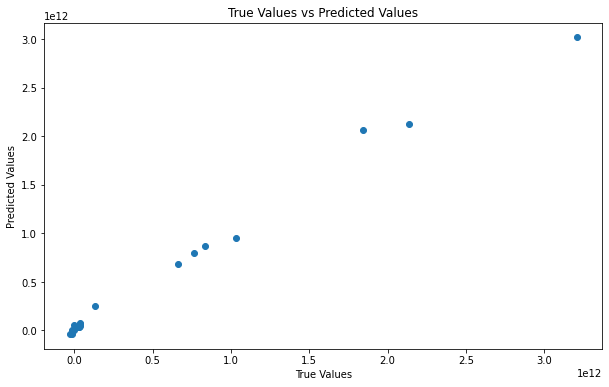

In [87]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# R^2 skorunu hesaplama
r2 = r2_score(y_test, y_pred)
print("R^2: ", r2)

# Gerçek değerlere karşı tahminleri çizme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")
plt.show()

In [88]:
importances = model.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

sorted_feature_importances = feature_importances.sort_values(ascending=False)

print(sorted_feature_importances)


labelStringclean
Total liabilities                                                                                 0.109049
Noninterest-bearing                                                                               0.083033
Other assets                                                                                      0.073199
Trading assets                                                                                    0.072437
Surplus (exclude all surplus related to preferred stock)                                          0.063463
Other liabilities                                                                                 0.055965
In domestic offices                                                                               0.054927
Premises and fixed assets (including capitalized leases)                                          0.054741
Total bank equity capital                                                                         0.054141
Securities purchased

In [89]:
sorted_feature_importances.sort_values(ascending=False).head(25)

labelStringclean
Total liabilities                                                                                 0.109049
Noninterest-bearing                                                                               0.083033
Other assets                                                                                      0.073199
Trading assets                                                                                    0.072437
Surplus (exclude all surplus related to preferred stock)                                          0.063463
Other liabilities                                                                                 0.055965
In domestic offices                                                                               0.054927
Premises and fixed assets (including capitalized leases)                                          0.054741
Total bank equity capital                                                                         0.054141
Securities purchased